## Objective

Comparative study of KNN and Decision tree for predicting Students Adaptability level in Online Education.

### Import libraries

In [77]:
#!pip install ydata_profiling

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np

In [111]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

### Read Data

In [112]:
data = pd.read_csv("/content/Saba Gul - students_adaptability_level_online_education - Saba Gul - students_adaptability_level_online_education.csv")
data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [113]:
data.shape

(1205, 14)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [115]:
data.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

In [116]:
data.isna().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [124]:
print(data['Class Duration'].nunique())
data['Class Duration'].unique()

3


array(['3-6', '1-3', '0'], dtype=object)

In [117]:
data.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


### Generate Data Profiling Report

In [86]:
# Generate the profile report
report = ProfileReport(data)

# Save the report to a file
report.to_file("data_profile_report.html")

# Alternatively, you can also display the report directly
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Since 20.4% of the data is duplicates, lets have them removed.

In [87]:
data.duplicated().sum()

949

In [88]:
data=data.drop_duplicates()

In [89]:
data.duplicated().sum()

0

In [90]:
data.shape

(256, 14)

# Encoding

let's analyze each column in the provided data and suggest appropriate encoding techniques based on the nature of the data:

1. **Gender**: This column has two categories ('Boy' and 'Girl'), which are nominal categories without any inherent order. One-hot encoding can be used to represent these categories as binary features ('Boy' -> 1, 'Girl' -> 0).

2. **Age**: This column represents age ranges ('11-15', '16-20', '21-25'), which are ordinal categories with a meaningful order. Ordinal encoding can be used to map these categories to integer values ('11-15' -> 1, '16-20' -> 2, '21-25' -> 3).

3. **Education Level**: This column represents educational levels ('University', 'College', 'School'), which are ordinal in nature.

4. **Institution Type**: This column represents types of institutions ('Non Government', 'Government'), which are nominal categories without any inherent order. One-hot encoding can be used to represent these categories as binary features ('Non Government' -> 1, 'Government' -> 0).

5. **IT Student, Location, Self Lms**: These columns represent binary attributes ('Yes' or 'No'). Label encoding can be used to map these categories to integers ('Yes' -> 1, 'No' -> 0) since there are only two categories.

6. **Load-shedding, Financial Condition**: These columns represent ordinal categories ('Low', 'Mid', 'High' for 'Load-shedding'; 'Poor', 'Mid' for 'Financial Condition'). Ordinal encoding can be used to map these categories to integer values.

7. **Internet Type**: This column represents nominal categories ('Wifi', 'Mobile Data'), which are suitable for one-hot encoding.

8. **Network Type**: This column represents nominal categories ('4G', '3G'), which are suitable for one-hot encoding.

9. **Class Duration**: This column represents ordinal categories ('0', '1-3', '3-6'). Ordinal encoding can be used to map these categories to integer values.

10. **Device**: This column represents nominal categories ('Tab', 'Mobile'), which are suitable for one-hot encoding.

11. **Adaptivity Level**: This column represents ordinal categories ('Moderate', 'Low'). Ordinal encoding can be used to map these categories to integer values.

In summary:

- One-hot encoding is suitable for nominal categorical variables without inherent order.
- Ordinal encoding is suitable for ordinal categorical variables with a meaningful order.
- Label encoding can be used for binary categorical variables with only two categories.

After encoding, the data will be transformed into numerical format, which can be used as input to machine learning models.


In [125]:
# One-hot encoding for nominal categorical variables
encoded_data = pd.get_dummies(data, columns=['Gender', 'Institution Type',
                                             'Internet Type', 'Network Type', 'Device'])

In [126]:
# Select the categorical columns for one-hot encoding
one_hot_encoded_cols = data[['Gender', 'Institution Type', 'Internet Type', 'Network Type', 'Device']]

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(one_hot_encoded_cols)

# Convert the one-hot encoded result to a DataFrame
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(one_hot_encoded_cols.columns))

# Remove the original categorical columns from the original DataFrame
data.drop(columns=one_hot_encoded_cols.columns, inplace=True)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
data = pd.concat([data, one_hot_encoded_df], axis=1)

In [128]:
# Ordinal encoding for ordinal categorical variables
ordinal_mapping = {
    'Age': {'1-5':1,'6-10':2, '11-15': 3, '16-20': 4, '21-25': 5, '26-30':6},
    'Education Level':{'School':1 ,'College':2 ,'University':3 },
    'Load-shedding': {'Low': 1, 'Mid': 2, 'High': 3},
    'Financial Condition': {'Poor': 1, 'Mid': 2, 'Rich':3},
    'Class Duration': {'0': 1, '1-3': 2, '3-6': 3},
    'Adaptivity Level': {'Low': 1, 'Moderate': 2, 'High':3}

}
for column, mapping in ordinal_mapping.items():
    data[column] = data[column].map(mapping)


In [129]:
# Label encoding for binary categorical variables
binary_mapping = {'Yes': 1, 'No': 0}
for column in ['IT Student', 'Location', 'Self Lms']:
    data[column] = data[column].map(binary_mapping)


In [95]:
data.head()

,Age,Education Level,IT Student,Location,Load-shedding,Financial Condition,Class Duration,Self Lms,Adaptivity Level,Gender_Boy,...,Institution Type_Government,Institution Type_Non Government,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Device_Computer,Device_Mobile,Device_Tab
0,4.0,3.0,0.0,1.0,1.0,2.0,3.0,0.0,2.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,4.0,3.0,0.0,1.0,3.0,2.0,2.0,1.0,2.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,3.0,2.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2.0,1.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,3.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Check distribution

In [132]:
from scipy import stats
from scipy.stats import zscore

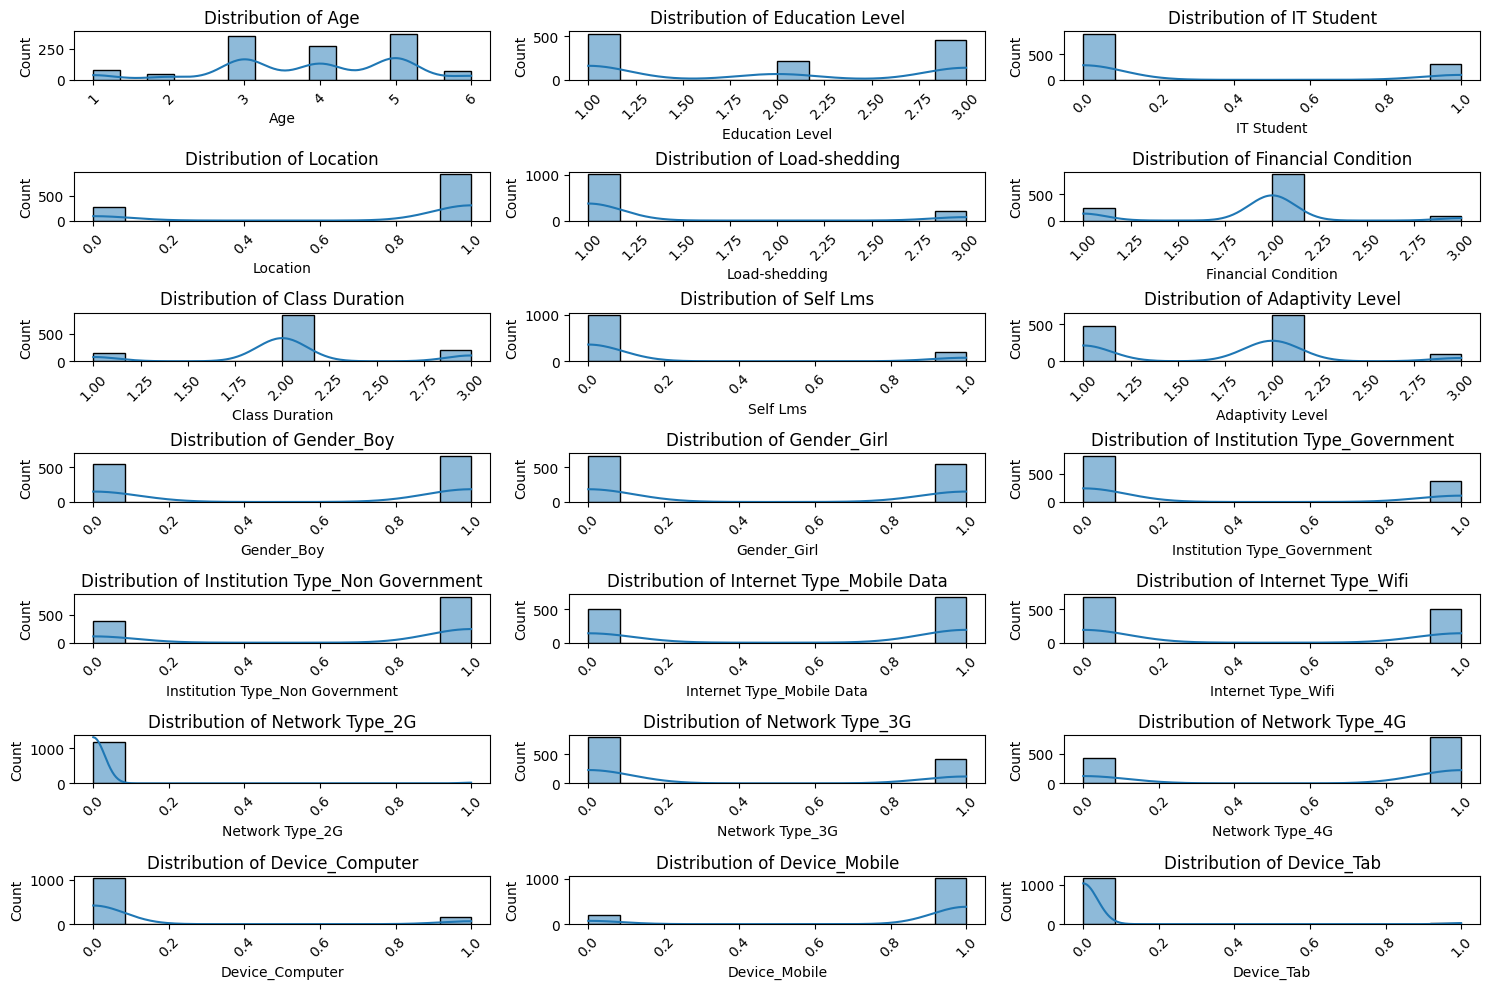

In [133]:
plt.figure(figsize=(15, 10))

# Iterate through each channel and plot on a separate subplot
for i, column in enumerate(data.columns):
    plt.subplot(7, 3, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

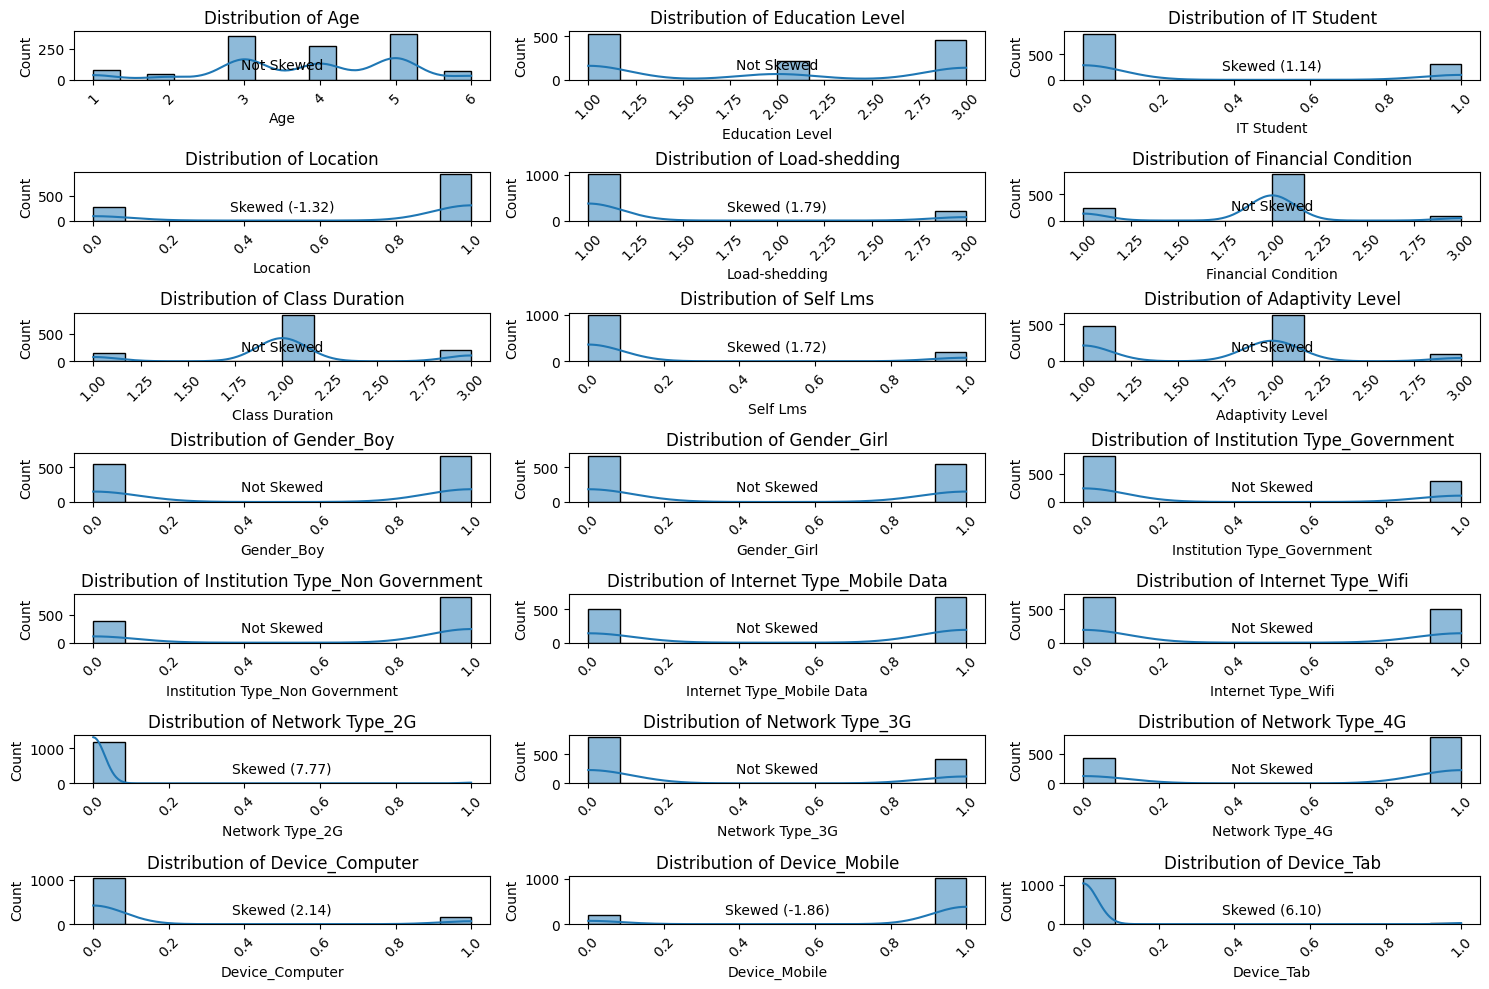

In [134]:
plt.figure(figsize=(15, 10))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(data.columns):
    plt.subplot(7, 3, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

    # Check for skewness
    skewness = stats.skew(data[column])
    if skewness < -1 or skewness > 1:
        plt.text(0.5, 0.3, f"Skewed ({skewness:.2f})", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.3, f"Not Skewed", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

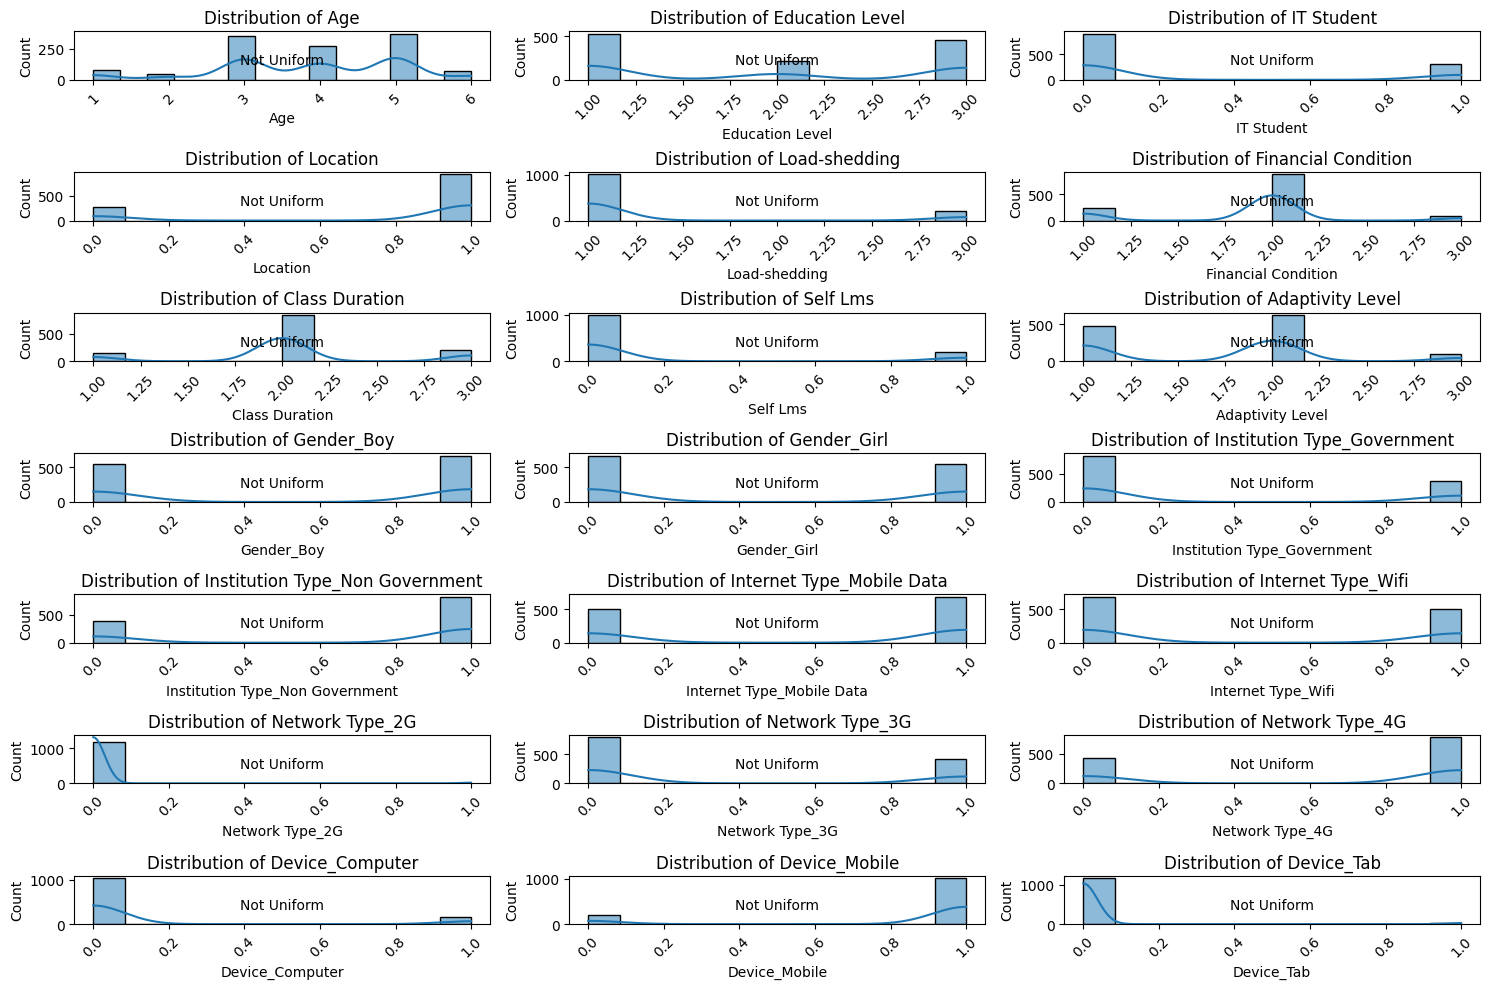

In [135]:
plt.figure(figsize=(15, 10))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(data.columns):
    plt.subplot(7, 3, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

    # Add additional analysis to detect distribution type
    # Check for uniform distribution
    min_val = data[column].min()
    max_val = data[column].max()
    if max_val - min_val < 1e-6:
        plt.text(0.5, 0.4, "Uniform", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.4, "Not Uniform", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Machine Learning Algorithms

Use KNN and Decision tree and find which one is working better.

### Define X and Y

In [136]:
X = data.drop( 'Adaptivity Level', axis=1)
y = data[ 'Adaptivity Level']

### Feature Scaling

In [137]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [138]:
# Normalize the features
min_max_scaler = MinMaxScaler()

In [139]:
min_max_scaler.fit(X)

MinMaxScaler()

In [140]:
scaled_features = min_max_scaler.transform(X)

In [141]:
scaled_features

array([[0.8, 1. , 0. , ..., 0. , 0. , 1. ],
       [0.8, 1. , 0. , ..., 0. , 1. , 0. ],
       [0.6, 0.5, 0. , ..., 0. , 1. , 0. ],
       ...,
       [0.4, 0. , 0. , ..., 0. , 1. , 0. ],
       [0.6, 0.5, 0. , ..., 0. , 1. , 0. ],
       [0.4, 0. , 0. , ..., 0. , 1. , 0. ]])

In [142]:
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

,Age,Education Level,IT Student,Location,Load-shedding,Financial Condition,Class Duration,Self Lms,Adaptivity Level,Gender_Boy,Gender_Girl,Institution Type_Government,Institution Type_Non Government,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Device_Computer,Device_Mobile
0,0.8,1.0,0.0,1.0,0.0,0.5,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.8,1.0,0.0,1.0,1.0,0.5,0.5,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.6,0.5,0.0,1.0,0.0,0.5,0.5,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.4,0.0,0.0,1.0,0.0,0.5,0.5,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Train Test Split

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,  y,  test_size=0.30)

# KNN

In [147]:
from sklearn.neighbors import KNeighborsClassifier

In [153]:
from sklearn.metrics import classification_report,confusion_matrix

Minimum error: 0.16574585635359115 at K = 0


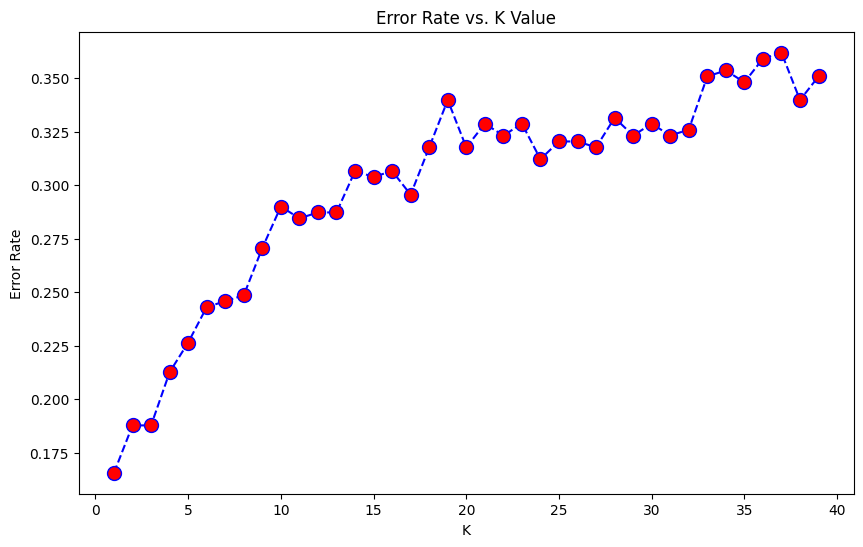

In [148]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy: 0.8342541436464088 at K = 0


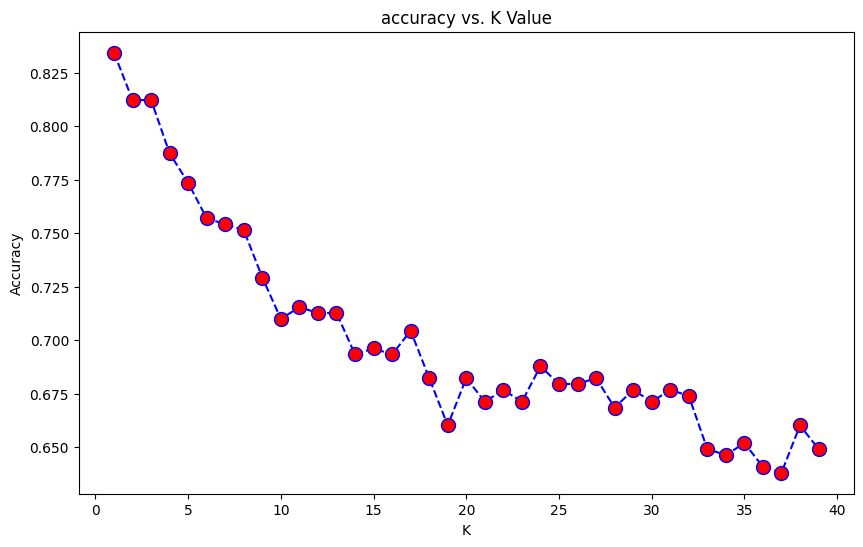

In [152]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc)))

In [149]:
knn = KNeighborsClassifier(n_neighbors=3)

In [150]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [151]:
pred = knn.predict(X_test)

In [156]:
#Training Accuracy
print(knn.score(X_train, y_train))

0.9098457888493475


In [157]:
#Testing Accuracy
print(knn.score(X_test, y_test))

0.8121546961325967


In [155]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.87      0.77      0.81       137
           2       0.80      0.88      0.84       188
           3       0.71      0.65      0.68        37

    accuracy                           0.81       362
   macro avg       0.79      0.76      0.78       362
weighted avg       0.81      0.81      0.81       362



In [154]:
print(confusion_matrix(y_test,pred))

[[105  31   1]
 [ 14 165   9]
 [  2  11  24]]


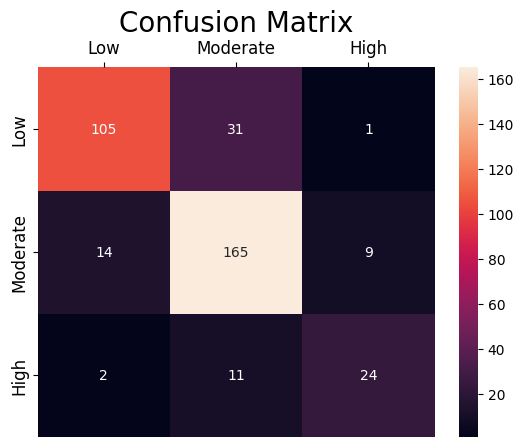

In [159]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred), annot=True, ax = ax, fmt = 'g');
ax.set_title('Confusion Matrix', fontsize=20)

ax.xaxis.set_ticklabels(['Low', 'Moderate', 'High'], fontsize = 12)
ax.xaxis.tick_top()

ax.yaxis.set_ticklabels(['Low', 'Moderate', 'High'], fontsize = 12)
plt.show()

#### Check different distance metric

**Euclidean**

In [190]:
knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

In [191]:
knn_euclidean.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [192]:
pred = knn_euclidean.predict(X_test)

In [193]:
#Training Accuracy
print(knn_euclidean.score(X_train, y_train))

0.9098457888493475


In [194]:
#Testing Accuracy
print(knn_euclidean.score(X_test, y_test))

0.8121546961325967


In [195]:
print('Classification report for Euclidean:')
print(classification_report(y_test,pred, digits=4))

Classification report for Euclidean:
              precision    recall  f1-score   support

           1     0.8678    0.7664    0.8140       137
           2     0.7971    0.8777    0.8354       188
           3     0.7059    0.6486    0.6761        37

    accuracy                         0.8122       362
   macro avg     0.7903    0.7642    0.7752       362
weighted avg     0.8145    0.8122    0.8110       362



In [196]:
print(confusion_matrix(y_test,pred))

[[105  31   1]
 [ 14 165   9]
 [  2  11  24]]


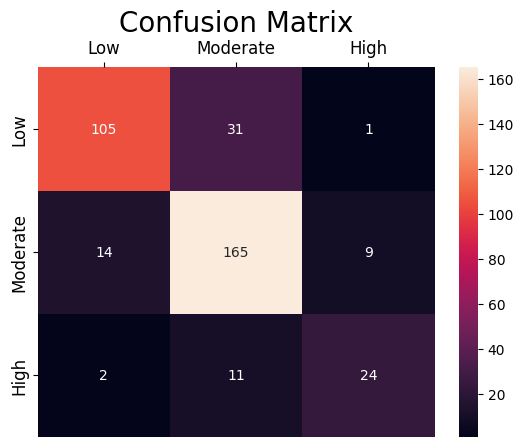

In [197]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred), annot=True, ax = ax, fmt = 'g');
ax.set_title('Confusion Matrix', fontsize=20)

ax.xaxis.set_ticklabels(['Low', 'Moderate', 'High'], fontsize = 12)
ax.xaxis.tick_top()

ax.yaxis.set_ticklabels(['Low', 'Moderate', 'High'], fontsize = 12)
plt.show()

**Manhattan**

In [198]:
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

In [199]:
knn_manhattan.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [200]:
pred = knn_manhattan.predict(X_test)

In [201]:
#Training Accuracy
print(knn_manhattan.score(X_train, y_train))

0.9110320284697508


In [202]:
#Testing Accuracy
print(knn_manhattan.score(X_test, y_test))

0.8149171270718232


In [204]:
print('Classification report for Manhattan:')
print(classification_report(y_test,pred, digits=4))

Classification report for Manhattan:
              precision    recall  f1-score   support

           1     0.8618    0.7737    0.8154       137
           2     0.7971    0.8777    0.8354       188
           3     0.7500    0.6486    0.6957        37

    accuracy                         0.8149       362
   macro avg     0.8030    0.7667    0.7822       362
weighted avg     0.8168    0.8149    0.8136       362



In [251]:
print(confusion_matrix(y_test,pred))

[[106  31   0]
 [ 15 165   8]
 [  2  11  24]]


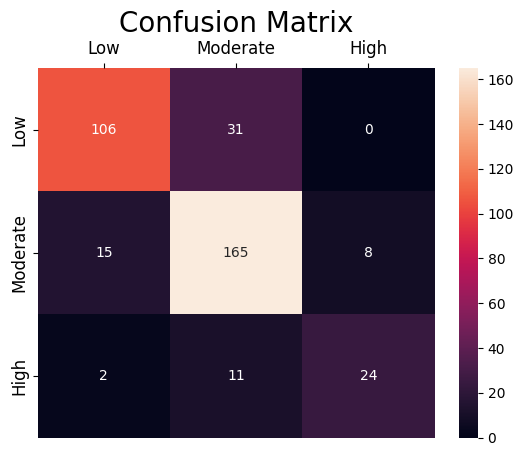

In [252]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred), annot=True, ax = ax, fmt = 'g');
ax.set_title('Confusion Matrix', fontsize=20)

ax.xaxis.set_ticklabels(['Low', 'Moderate', 'High'], fontsize = 12)
ax.xaxis.tick_top()

ax.yaxis.set_ticklabels(['Low', 'Moderate', 'High'], fontsize = 12)
plt.show()

The classification reports for the models using Manhattan and Euclidean distances show similar performance metrics, with slight differences in precision, recall, and F1-score for some classes.

- **Precision**: Precision measures the proportion of true positive predictions among all positive predictions made by the classifier. In both reports, precision is highest for Class 1, followed by Class 2, and lowest for Class 3. Precision values for both models are close but vary slightly.

- **Recall**: Recall measures the proportion of true positive predictions among all actual positive instances in the dataset. Like precision, recall is highest for Class 1 in both reports, followed by Class 2 and then Class 3. Recall values are similar between the two models but show slight differences.

- **F1-score**: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. F1-scores for both models are highest for Class 2, followed by Class 1 and then Class 3. Like precision and recall, F1-scores are close between the two models but exhibit slight differences.

- **Accuracy**: The accuracy for both models is similar, with Manhattan achieving an accuracy of 0.8149 and Euclidean achieving an accuracy of 0.8122.

Overall, both models show comparable performance, with Manhattan having slightly higher precision and F1-score for some classes, while Euclidean has slightly higher recall for some classes. The choice between the two distance metrics may depend on other factors such as computational efficiency or interpretability.

# Decision Tree

**Using Entropy**

In [205]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [206]:
# Initializing and training the Decision Tree Classifier with Gini impurity
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [207]:
# Making predictions and evaluating the models
y_pred_gini = dt_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)

accuracy_gini

0.9033149171270718

**Use Gini Index**

In [208]:
# Initializing and training the Decision Tree Classifier with Information Gain (Entropy)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [209]:
# Making predictions and evaluating the models
y_pred_entropy = dt_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

accuracy_entropy

0.8895027624309392

In [242]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Assuming y_test, y_pred_gini, and y_pred_entropy are already defined from your model predictions

# Evaluation metrics for Gini model
confusion_gini = confusion_matrix(y_test, y_pred_gini)
precision_gini = precision_score(y_test, y_pred_gini, average='weighted')
recall_gini = recall_score(y_test, y_pred_gini, average='weighted')
f1_score_gini = f1_score(y_test, y_pred_gini, average='weighted')

# Printing the evaluation metrics
print("Gini Model Evaluation Metrics:")
print("Confusion Matrix:\n", confusion_gini)
print("Precision: {:.2f}".format(precision_gini))
print("Recall: {:.2f}".format(recall_gini))
print("F1 Score: {:.2f}".format(f1_score_gini))



Gini Model Evaluation Metrics:
Confusion Matrix:
 [[137   0   0]
 [188   0   0]
 [ 37   0   0]]
Precision: 0.14
Recall: 0.38
F1 Score: 0.21


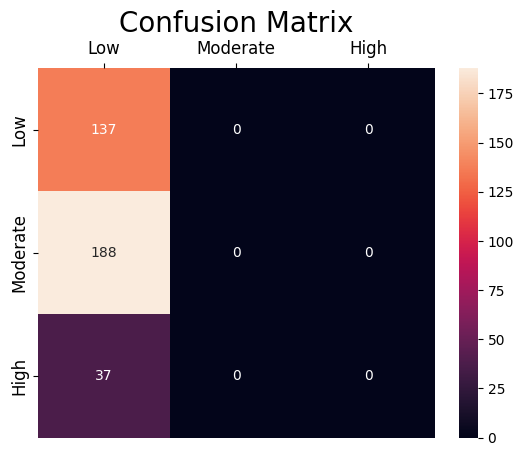

In [243]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_gini), annot=True, ax = ax, fmt = 'g');
ax.set_title('Confusion Matrix', fontsize=20)

ax.xaxis.set_ticklabels(['Low', 'Moderate', 'High'], fontsize = 12)
ax.xaxis.tick_top()

ax.yaxis.set_ticklabels(['Low', 'Moderate', 'High'], fontsize = 12)
plt.show()


In [244]:
# Evaluation metrics for Entropy model
confusion_entropy = confusion_matrix(y_test, y_pred_entropy)
precision_entropy = precision_score(y_test, y_pred_entropy, average='weighted')
recall_entropy = recall_score(y_test, y_pred_entropy, average='weighted')
f1_score_entropy = f1_score(y_test, y_pred_entropy, average='weighted')

# Printing the evaluation metrics
print("\nEntropy Model Evaluation Metrics:")
print("Confusion Matrix:\n", confusion_entropy)
print("Precision: {:.2f}".format(precision_entropy))
print("Recall: {:.2f}".format(recall_entropy))
print("F1 Score: {:.2f}".format(f1_score_entropy))



Entropy Model Evaluation Metrics:
Confusion Matrix:
 [[120  17   0]
 [  8 175   5]
 [  1   9  27]]
Precision: 0.89
Recall: 0.89
F1 Score: 0.89


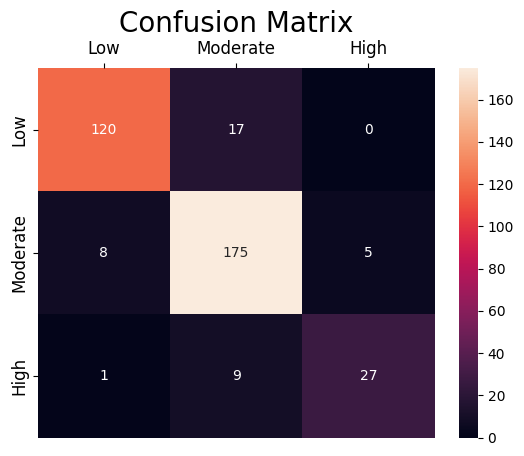

In [245]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_entropy), annot=True, ax = ax, fmt = 'g');
ax.set_title('Confusion Matrix', fontsize=20)

ax.xaxis.set_ticklabels(['Low', 'Moderate', 'High'], fontsize = 12)
ax.xaxis.tick_top()

ax.yaxis.set_ticklabels(['Low', 'Moderate', 'High'], fontsize = 12)
plt.show()

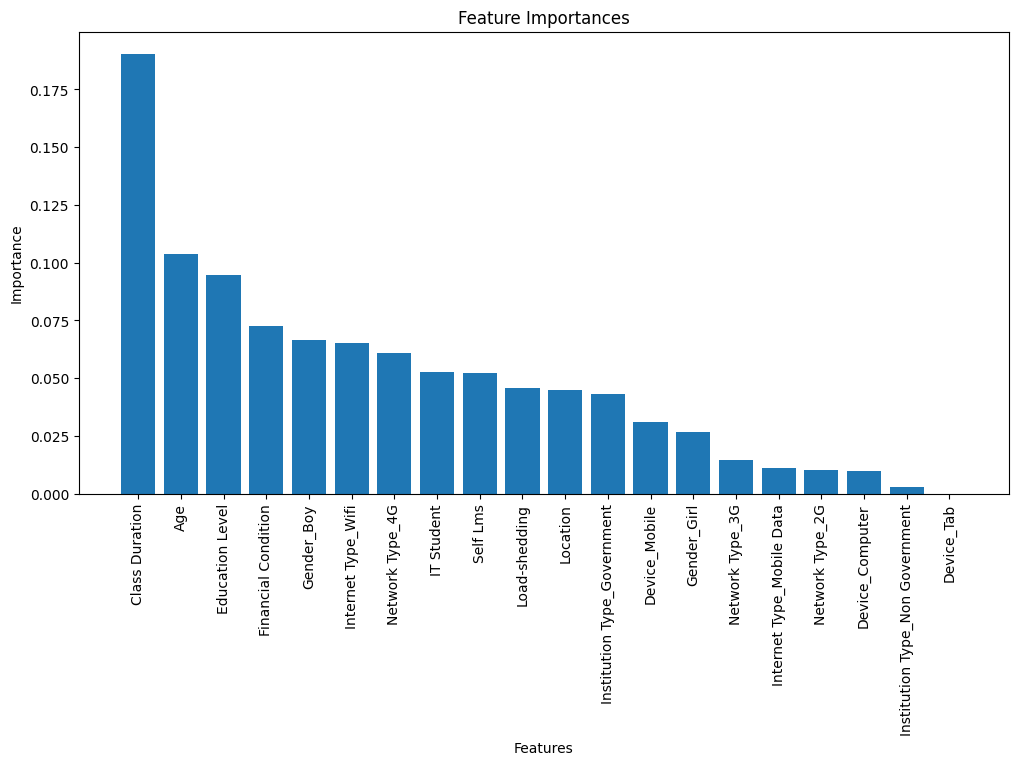

In [253]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a dataset 'df_encoded' and target variable 'y'

# Train a Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X, y)

# Get Feature Importances
importances = dt_model.feature_importances_

# Convert to a DataFrame
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Visualize Feature Importances
plt.figure(figsize=(12, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()

Sure, here's a brief comparison of the Entropy and Gini models based on the provided evaluation metrics:

### Entropy Model:
- **Confusion Matrix**:
  - Shows a balanced distribution of predictions across all classes, with some misclassifications.
- **Precision**:
  - High precision (0.89) indicates that the model makes relatively few false positive errors.
- **Recall**:
  - High recall (0.89) indicates that the model effectively captures most of the true positive instances.
- **F1 Score**:
  - The harmonic mean of precision and recall is high (0.89), suggesting a good balance between precision and recall.

### Gini Model:
- **Confusion Matrix**:
  - Predicts all instances as belonging to class 1, resulting in no predictions for classes 2 and 3.
- **Precision**:
  - Low precision (0.14) indicates a high rate of false positive errors.
- **Recall**:
  - Recall is 1 for class 1 (due to all instances being predicted as class 1) and 0 for classes 2 and 3.
- **F1 Score**:
  - The F1-score (0.21) reflects poor overall performance due to the imbalance in predictions and lack of predictions for classes 2 and 3.

### Comparison:
- **Entropy Model**:
  - Demonstrates balanced predictions across classes with relatively high precision, recall, and F1-score.
  - Provides more reliable predictions across all classes, indicating better generalization.
  
- **Gini Model**:
  - Predicts all instances as belonging to class 1, resulting in poor performance metrics.
  - Appears to suffer from issues such as class imbalance or model misconfiguration.

In summary, the Entropy model outperforms the Gini model in terms of making balanced predictions across classes and achieving higher precision, recall, and F1-score. The Gini model's poor performance may require further investigation into model architecture, parameter tuning, or dataset preprocessing to address underlying issues.


The comparison you've provided offers a comprehensive analysis of both the KNN models using Manhattan and Euclidean distances and the decision tree models (Entropy and Gini). Here's a summary of the key points:

### KNN Models (Manhattan and Euclidean):
- **Similar Performance**: Both models show comparable performance metrics, including precision, recall, and F1-score.
- **Precision, Recall, F1-score**: All metrics are highest for Class 2, followed by Class 1 and then Class 3. The differences in metrics between the two models are minor.
- **Accuracy**: Both models achieve similar accuracy, with Manhattan slightly outperforming Euclidean.
- **Overall Comparison**: Both models demonstrate balanced performance, with minor variations in precision, recall, and F1-score across classes. The choice between Manhattan and Euclidean distances may depend on factors such as computational efficiency or interpretability.

### Decision Tree Models (Entropy and Gini):
- **Entropy Model**:
  - Balanced Predictions: Shows a balanced distribution of predictions across all classes.
  - High Performance: Achieves high precision, recall, and F1-score, indicating reliable predictions across all classes.
- **Gini Model**:
  - Imbalanced Predictions: Predicts all instances as belonging to class 1, resulting in poor performance metrics.
  - Poor Performance: Low precision, recall, and F1-score indicate issues such as class imbalance or model misconfiguration.

### Overall Comparison:
- **KNN vs. Decision Tree**:
  - KNN models demonstrate balanced performance with minor variations, while the decision tree models show significant differences in performance between Entropy and Gini.
  - Decision tree models (especially Entropy) outperform the KNN models in terms of reliability and overall performance.
- **Improvement Areas**: The Gini model requires further investigation and potential improvements to address issues such as class imbalance or model misconfiguration.

In summary, while both KNN and decision tree models show strengths and weaknesses, the decision tree models, particularly the one based on Entropy, exhibit more reliable and balanced performance across classes compared to the KNN models. Further investigation and potential enhancements are needed for the Gini model to improve its performance.

Let me know if you need further clarification or assistance!